Importing pandas and reading the brain size csv file

In [5]:
import pandas
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")
print(data)

    Unnamed: 0  Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0            1  Female   133  132  124   118.0    64.5     816932
1            2    Male   140  150  124     NaN    72.5    1001121
2            3    Male   139  123  150   143.0    73.3    1038437
3            4    Male   133  129  128   172.0    68.8     965353
4            5  Female   137  132  134   147.0    65.0     951545
5            6  Female    99   90  110   146.0    69.0     928799
6            7  Female   138  136  131   138.0    64.5     991305
7            8  Female    92   90   98   175.0    66.0     854258
8            9    Male    89   93   84   134.0    66.3     904858
9           10    Male   133  114  147   172.0    68.8     955466
10          11  Female   132  129  124   118.0    64.5     833868
11          12    Male   141  150  128   151.0    70.0    1079549
12          13    Male   135  129  124   155.0    69.0     924059
13          14  Female   140  120  147   155.0    70.5     856472
14        

Importing numpy and creating from array

In [6]:
import numpy as np
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

esposing pandas dataframe

In [7]:
pandas.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


Manipulating the data sp that it resembles R

In [8]:
data.shape    # 40 rows and 8 columns

(40, 8)

In [9]:
data.columns  # It has columns 

Index(['Unnamed: 0', 'Gender', 'FSIQ', 'VIQ', 'PIQ', 'Weight', 'Height',
       'MRI_Count'],
      dtype='object')

In [10]:
print(data['Gender'])  # Columns can be addressed by name

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


In [11]:
# Simpler selector
data[data['Gender'] == 'Female']['VIQ'].mean()

np.float64(109.45)

Grouping the data by gender

In [12]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', np.float64(109.45))
('Male', np.float64(115.25))


In [13]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


Plotting the data that was generated

array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='MRI_Count', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='MRI_Count', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='MRI_Count'>,
        <Axes: xlabel='Height', ylabel='MRI_Count'>,
        <Axes: xlabel='MRI_Count', ylabel='MRI_Count'>]], dtype=object)

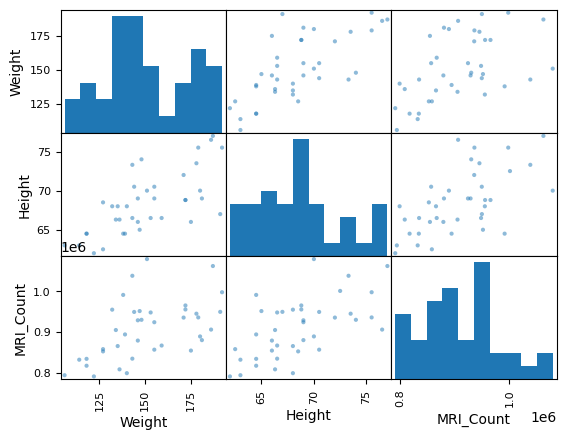

In [15]:
from pandas import plotting
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

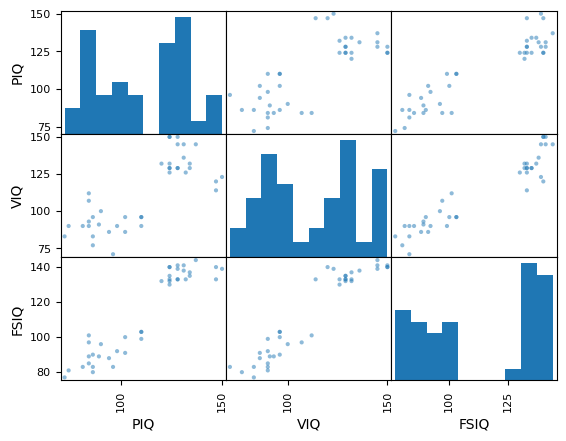

In [16]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])   

using scipy to do statistical analysis

In [17]:
from scipy import stats

In [18]:
stats.ttest_1samp(data['VIQ'], 0)  

TtestResult(statistic=np.float64(30.08809997084933), pvalue=np.float64(1.3289196468727879e-28), df=np.int64(39))

In [19]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)   

TtestResult(statistic=np.float64(-0.7726161723275012), pvalue=np.float64(0.44452876778583217), df=np.float64(38.0))

In [20]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])   

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

In [21]:
stats.ttest_rel(data['FSIQ'], data['PIQ']) 

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

In [22]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)  

TtestResult(statistic=np.float64(1.7842019405859857), pvalue=np.float64(0.08217263818364236), df=np.int64(39))

In [23]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])   

WilcoxonResult(statistic=np.float64(274.5), pvalue=np.float64(0.10659492713506856))

 Linear models, multiple factors, and analysis of variance

In [24]:
import numpy as np
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pandas.DataFrame({'x': x, 'y': y})

In [25]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data).fit()

In [26]:
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           8.56e-08
Time:                        16:32:46   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

In [28]:
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")

In [29]:
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Thu, 11 Jul 2024   Prob (F-statistic):              0.445
Time:                        16:37:39   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

In [30]:
model = ols('VIQ ~ C(Gender)', data).fit()

In [31]:
data_fisq = pandas.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pandas.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pandas.concat((data_fisq, data_piq))
print(data_long)  

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


In [32]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])  

TtestResult(statistic=np.float64(0.465637596380964), pvalue=np.float64(0.6427725009414841), df=np.float64(78.0))

In [19]:
import matplotlib.pyplot as plt

import pandas
from pandas import plotting

from statsmodels.formula.api import ols

# Load the data
data = pandas.read_csv('iris.csv')

Text(0.5, 0.98, 'blue: setosa, green: versicolor, red: virginica')

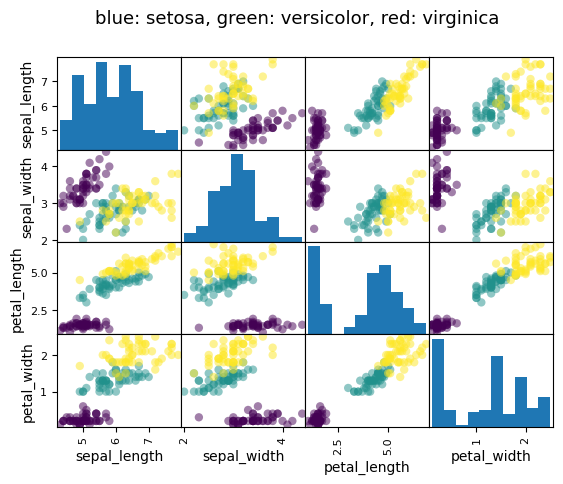

In [20]:
# Express the names as categories
categories = pandas.Categorical(data['name'])

# The parameter 'c' is passed to plt.scatter and will control the color
plotting.scatter_matrix(data, c=categories.codes, marker='o')

fig = plt.gcf()
fig.suptitle("blue: setosa, green: versicolor, red: virginica", size=13)

In [21]:
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary())
print('Testing the difference between effect of versicolor and virginica')
print(model.f_test([0, 1, -1, 0]))
plt.show()

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           1.58e-20
Time:                        16:25:21   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

In [34]:
print(model.f_test([0, 1, -1, 0])) 

<F test: F=3.2453353465741173, p=0.07369058781701415, df_denom=146, df_num=1>


In [35]:
print(data)

     sepal_length  sepal_width  petal_length  petal_width       name
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [37]:
import urllib
import os

import matplotlib.pyplot as plt

In [40]:
import os
import urllib.request  # Correct module for urlretrieve in Python 3

if not os.path.exists('wages.txt'):
    # Download the file if it is not present
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages', 'wages.txt')

In [41]:
# Give names to the columns
names = [
    'EDUCATION: Number of years of education',
    'SOUTH: 1=Person lives in South, 0=Person lives elsewhere',
    'SEX: 1=Female, 0=Male',
    'EXPERIENCE: Number of years of work experience',
    'UNION: 1=Union member, 0=Not union member',
    'WAGE: Wage (dollars per hour)',
    'AGE: years',
    'RACE: 1=Other, 2=Hispanic, 3=White',
    'OCCUPATION: 1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other',
    'SECTOR: 0=Other, 1=Manufacturing, 2=Construction',
    'MARR: 0=Unmarried,  1=Married',
]

short_names = [n.split(':')[0] for n in names]

data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None)
data.columns = short_names

# Log-transform the wages, because they typically are increased with
# multiplicative factors
import numpy as np
data['WAGE'] = np.log10(data['WAGE'])

/tmp/ipykernel_102/2038127414.py:18: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,


In [3]:
import pandas
from statsmodels.formula.api import ols
data = pandas.read_csv('iris.csv')
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           1.58e-20
Time:                        16:05:35   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

In [4]:
print(model.f_test([0, 1, -1, 0]))  

<F test: F=3.2453353465741173, p=0.07369058781701415, df_denom=146, df_num=1>


In [ ]:
Using seaborn

Text(0.5, 0.98, 'Effect of union: 1=Union member, 0=Not union member')

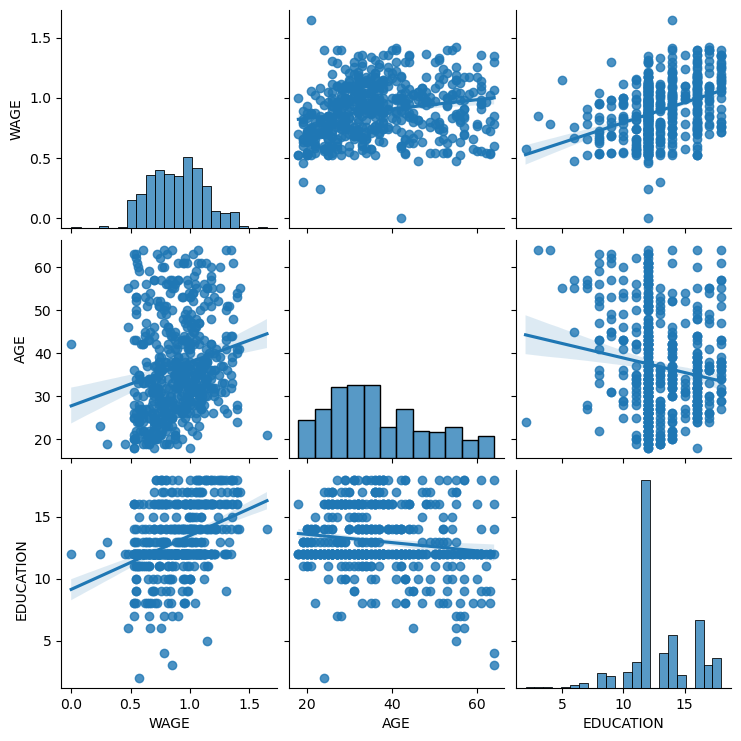

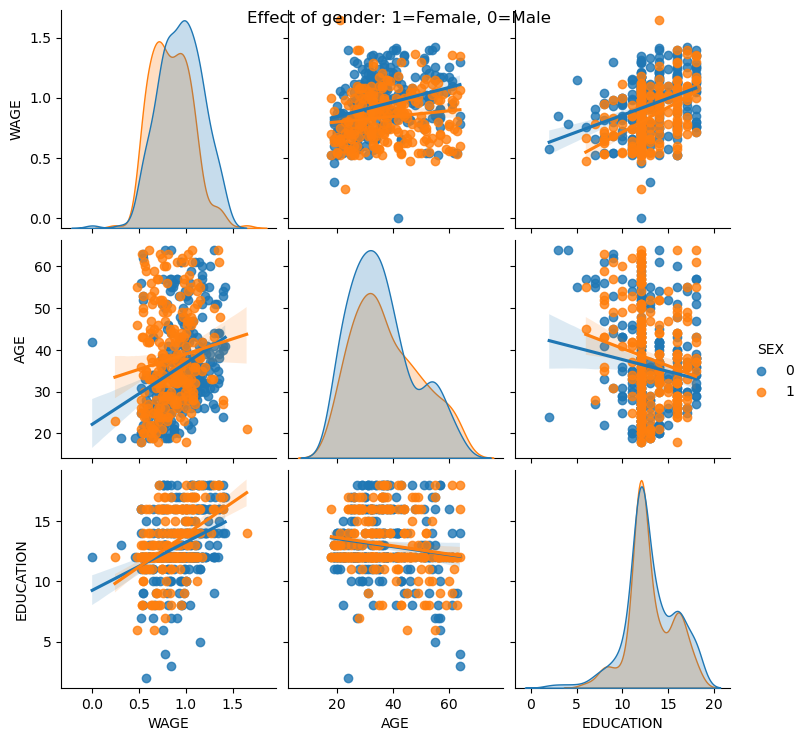

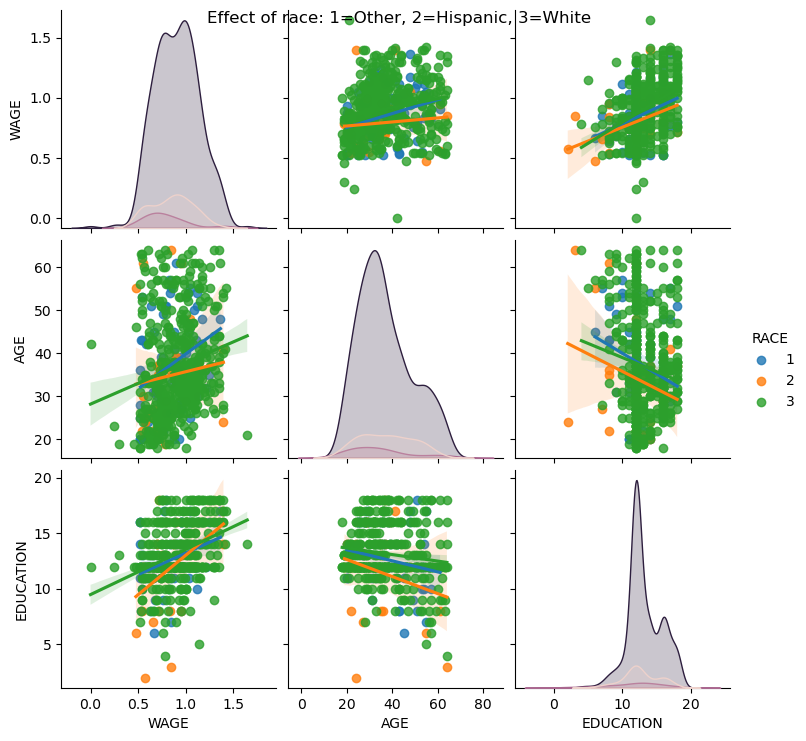

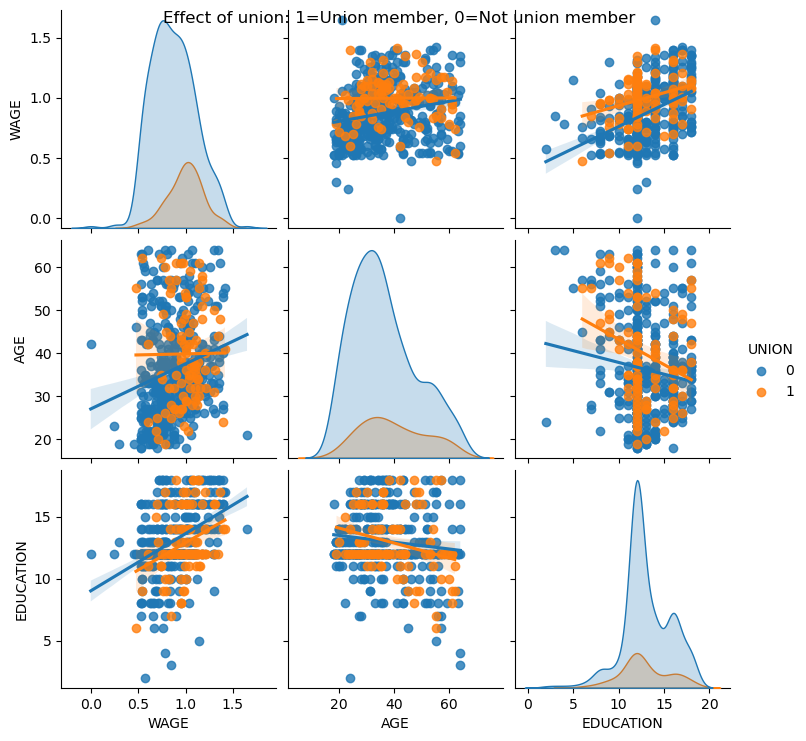

In [42]:
import seaborn
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='SEX')
plt.suptitle('Effect of gender: 1=Female, 0=Male')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='RACE')
plt.suptitle('Effect of race: 1=Other, 2=Hispanic, 3=White')

seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                      kind='reg', hue='UNION')
plt.suptitle('Effect of union: 1=Union member, 0=Not union member')

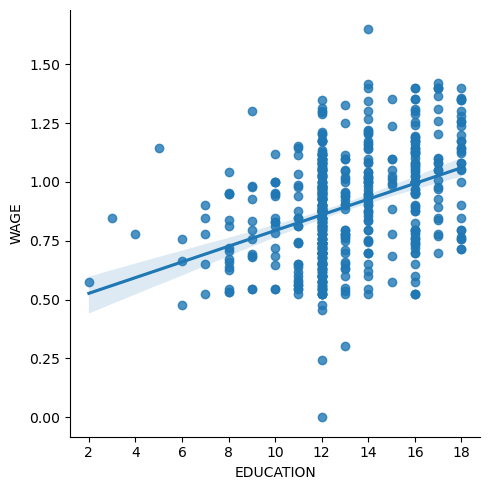

In [43]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)

plt.show()

In [44]:
print(data) 

     EDUCATION  SOUTH  SEX  EXPERIENCE  UNION      WAGE  AGE  RACE  \
0            8      0    1          21      0  0.707570   35     2   
1            9      0    1          42      0  0.694605   57     3   
2           12      0    0           1      0  0.824126   19     3   
3           12      0    0           4      0  0.602060   22     3   
4           12      0    0          17      0  0.875061   35     3   
..         ...    ...  ...         ...    ...       ...  ...   ...   
529         18      0    0           5      0  1.055378   29     3   
530         12      0    1          33      0  0.785330   51     1   
531         17      0    1          25      1  1.366423   48     1   
532         12      1    0          13      1  1.298416   31     3   
533         16      0    0          33      0  1.186956   55     3   

     OCCUPATION  SECTOR  MARR  
0             6       1     1  
1             6       1     1  
2             6       1     0  
3             6       0     0  

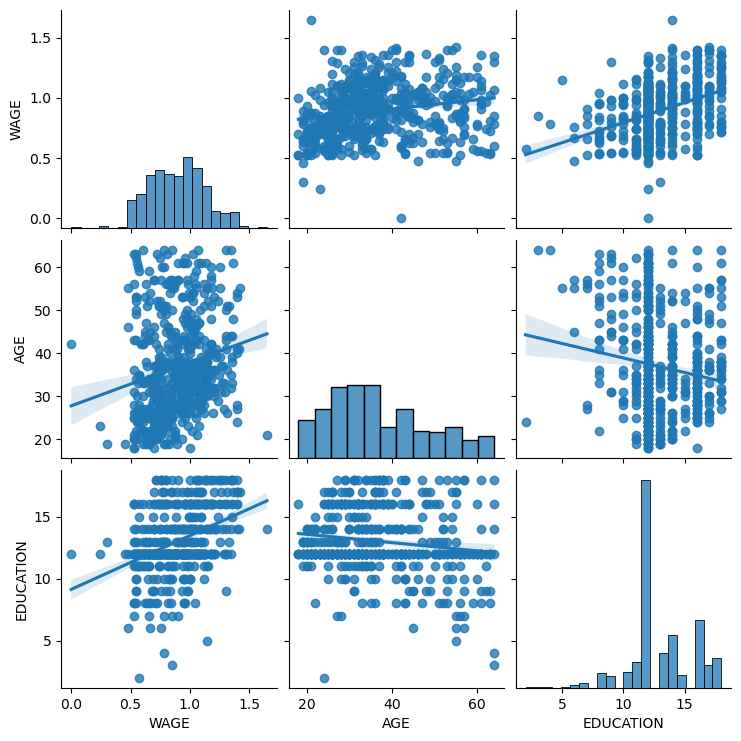

In [45]:
import seaborn
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg')  

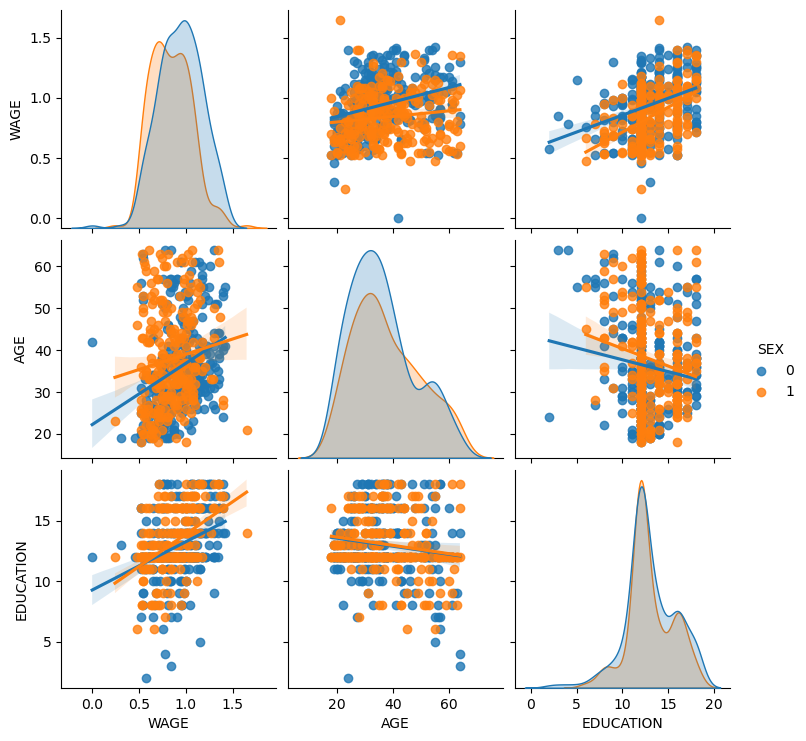

In [46]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg', hue='SEX')  

In [47]:
from matplotlib import pyplot as plt
plt.rcdefaults()

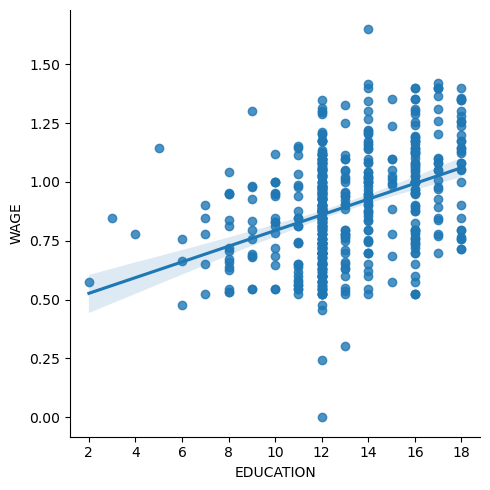

In [48]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)  

In [13]:
import pandas

import urllib
import os

if not os.path.exists('wages.txt'):
    # Download the file if it is not present
    urllib.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
                       'wages.txt')

# EDUCATION: Number of years of education
# SEX: 1=Female, 0=Male
# WAGE: Wage (dollars per hour)
data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,
                       header=None, names=['education', 'gender', 'wage'],
                       usecols=[0, 2, 5],
                       )

# Convert genders to strings (this is particulary useful so that the
# statsmodels formulas detects that gender is a categorical variable)
import numpy as np
data['gender'] = np.choose(data.gender, ['male', 'female'])

# Log-transform the wages, because they typically are increased with
# multiplicative factors
data['wage'] = np.log10(data['wage'])

/tmp/ipykernel_257/1133257776.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  data = pandas.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,


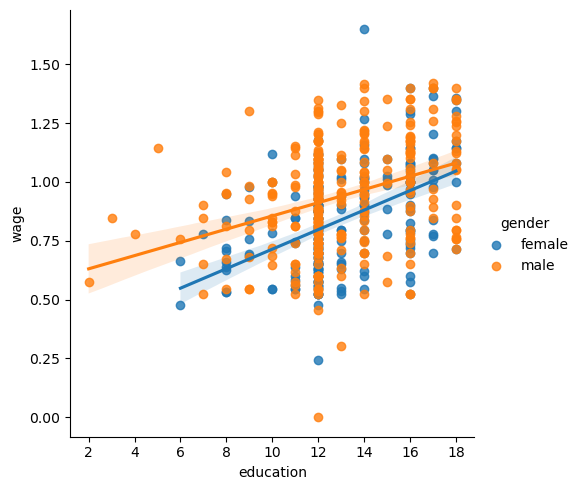

In [14]:
import seaborn


seaborn.lmplot(y='wage', x='education', hue='gender', data=data)

Statistical Analysis

In [15]:
import statsmodels.formula.api as sm

result = sm.ols(formula='wage ~ education + gender', data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     63.42
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           2.01e-25
Time:                        16:16:12   Log-Likelihood:                 86.654
No. Observations:                 534   AIC:                            -167.3
Df Residuals:                     531   BIC:                            -154.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4053      0.046      8.

In [16]:
result = sm.ols(formula='wage ~ education + gender + education * gender',
                data=data).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     43.72
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           2.94e-25
Time:                        16:16:46   Log-Likelihood:                 88.503
No. Observations:                 534   AIC:                            -169.0
Df Residuals:                     530   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               